# 시계열 데이터 분석 (정석)

ACF plot과 PACF plot을 통해 모수를 추정하여 차분을 수행하여 분석하는 방법

ARIMA를 수행하기 위해선 ~

정상성을 검정하는게  ADF 테스트 

p값이 높으면 차분 ㄱㄱ 

시계열 분석해서 데이터의 트렌드 , 계절서, 노이즈로 분해 

ACF - PACF 분석으로 pq를 구한다. -> 근데 auto_pcf? 로 베스트 모델 가능 . 


## #01. 작업준비

### 패키지 참조

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import exp_timedata

### 데이터 가져오기

> 이미 앞 예제를 통해 데이터가 비정상성임을 확인함

In [2]:
df = read_excel("https://data.hossam.kr/E06/air_passengers.xlsx",index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

결측치 수 :  0


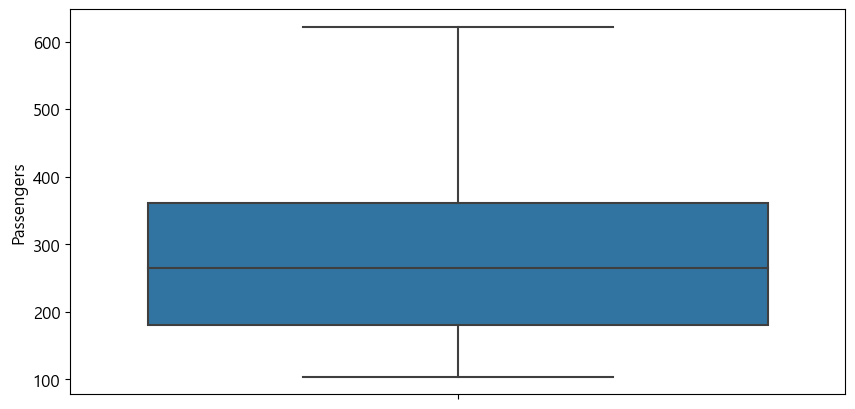

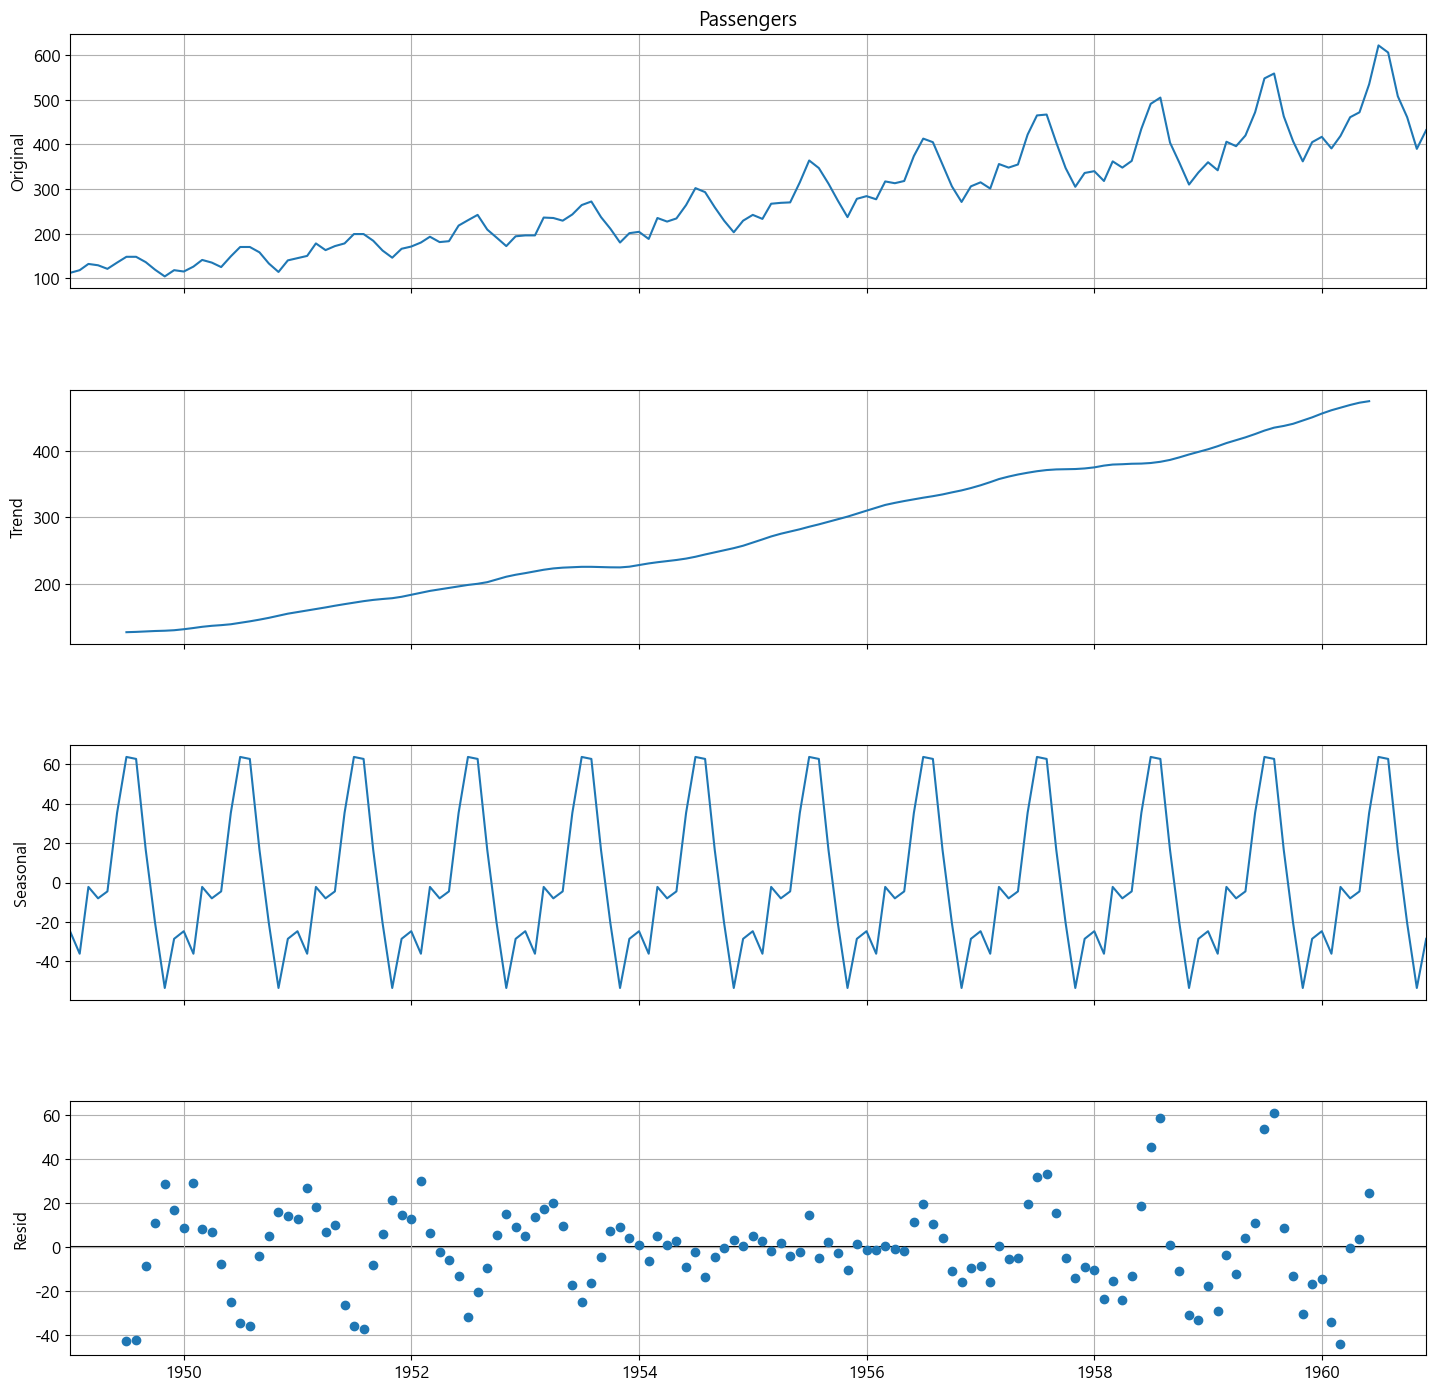

=========== 원본 데이터 ===========
+------------------------------------+----------+
| ADF                                |          |
|------------------------------------+----------|
| 검정통계량 (ADF Statistic)         | 0.815369 |
| p-value                            |  0.99188 |
| 최적 차수                          |       13 |
| 관측치 개수                        |      130 |
| 기각값 1%                          | -3.48168 |
| 기각값 5%                          | -2.88404 |
| 기각값 10%                         | -2.57877 |
| 데이터 정상성 여부(0=Flase,1=True) |        0 |
+------------------------------------+----------+


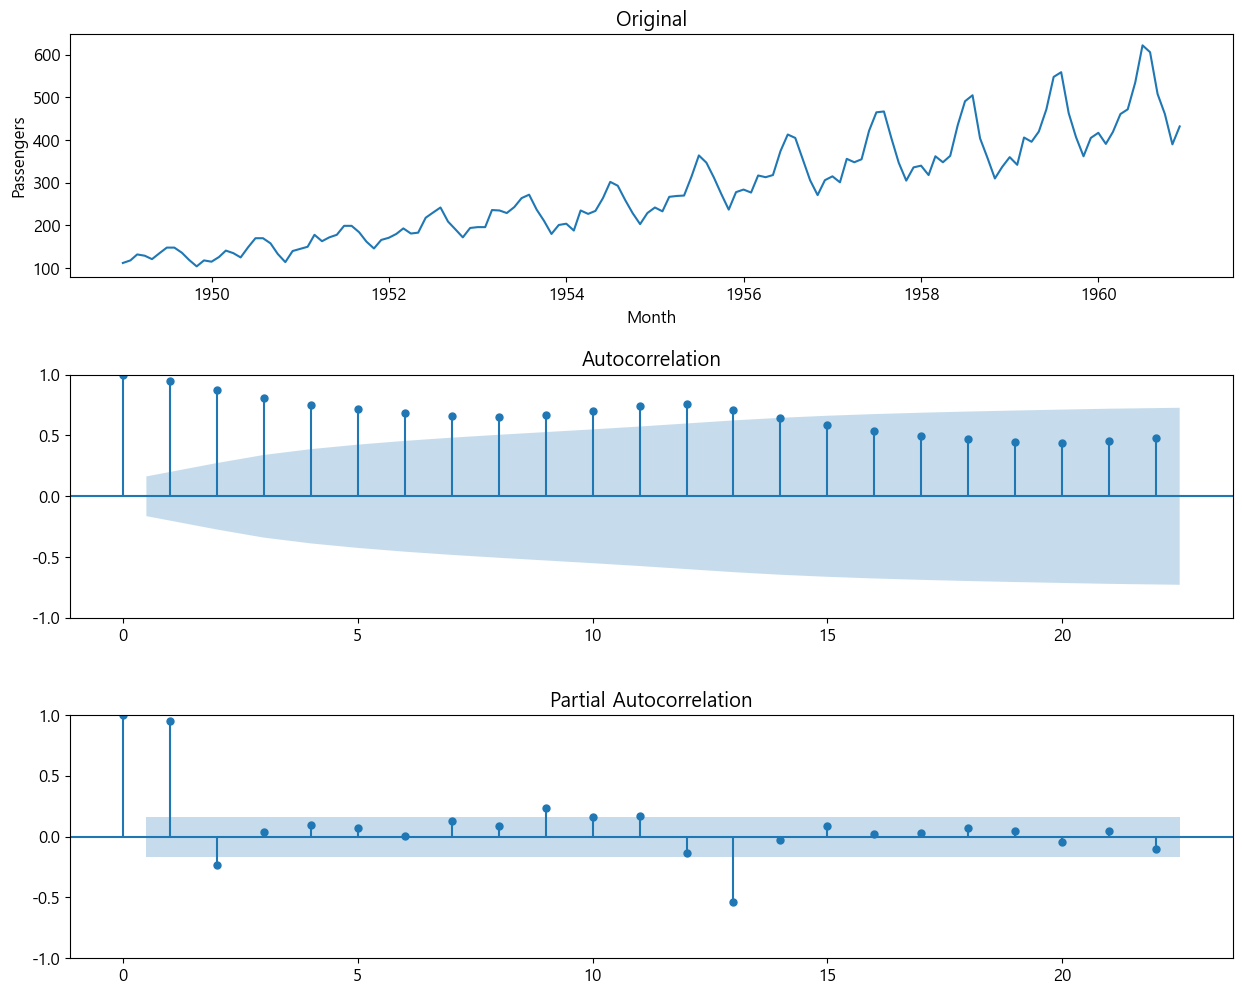

=========== 1차 차분 데이터 ===========
+------------------------------------+-----------+
| ADF                                |           |
|------------------------------------+-----------|
| 검정통계량 (ADF Statistic)         |  -2.82927 |
| p-value                            | 0.0542133 |
| 최적 차수                          |        12 |
| 관측치 개수                        |       130 |
| 기각값 1%                          |  -3.48168 |
| 기각값 5%                          |  -2.88404 |
| 기각값 10%                         |  -2.57877 |
| 데이터 정상성 여부(0=Flase,1=True) |         0 |
+------------------------------------+-----------+


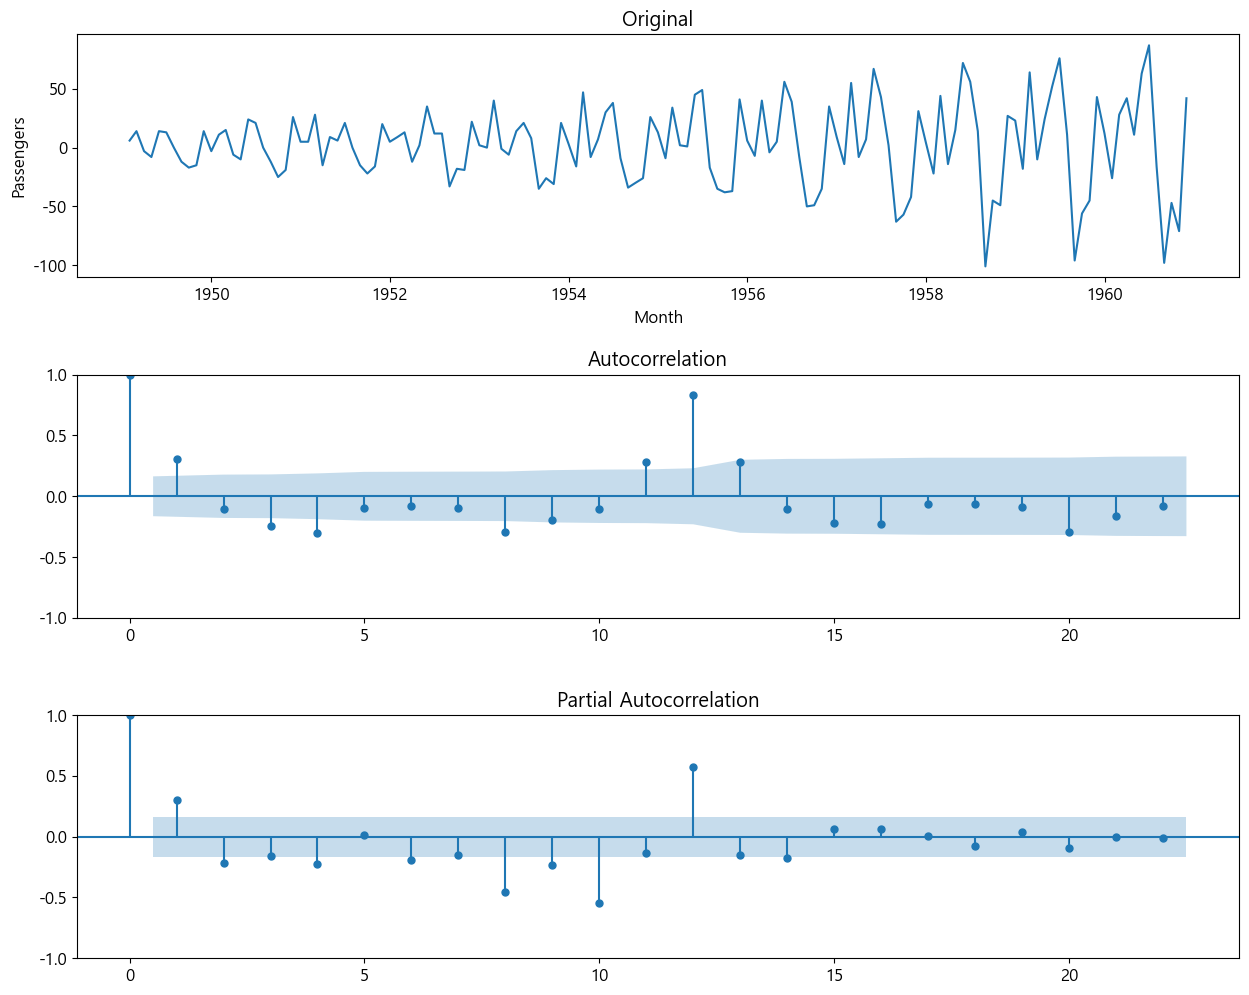

=========== 2차 차분 데이터 ===========
+------------------------------------+-------------+
| ADF                                |             |
|------------------------------------+-------------|
| 검정통계량 (ADF Statistic)         |    -16.3842 |
| p-value                            | 2.73289e-29 |
| 최적 차수                          |          11 |
| 관측치 개수                        |         130 |
| 기각값 1%                          |    -3.48168 |
| 기각값 5%                          |    -2.88404 |
| 기각값 10%                         |    -2.57877 |
| 데이터 정상성 여부(0=Flase,1=True) |           1 |
+------------------------------------+-------------+


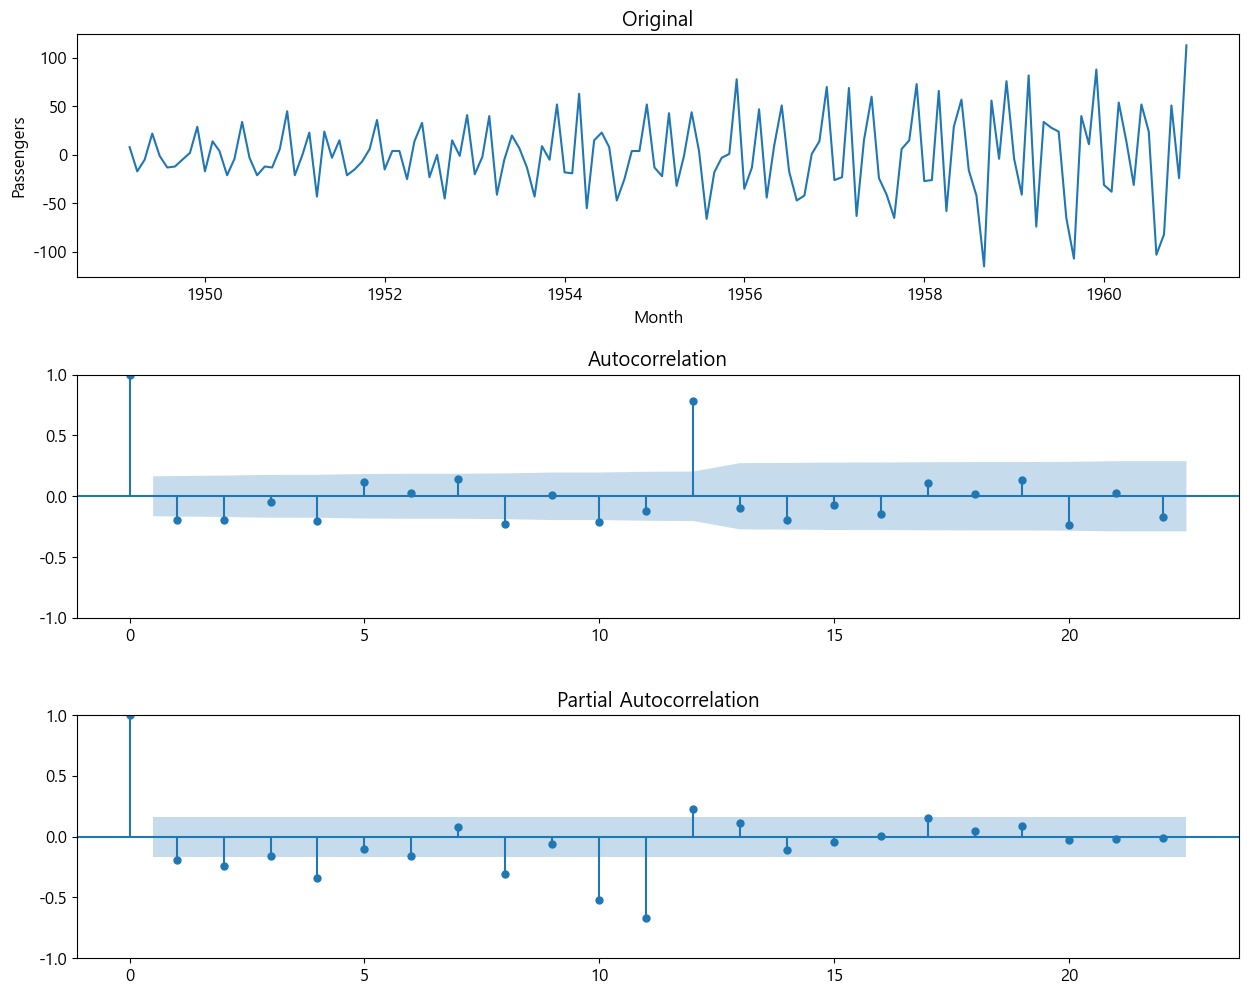

In [4]:

exp_timedata(df, 'Passengers', "a", max_diff=10)